## Importando as Bibliotecas:

In [465]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
from matplotlib import pyplot as plt
from plotly import graph_objects as go

## Etapa 1. Carregando os dados:

In [466]:
df_mensalidade = pd.read_excel('Case_frete.xlsx', sheet_name='Tb_mensalidade')
df_porte = pd.read_excel('Case_frete.xlsx', sheet_name='Tb_Porte')
df_fretes = pd.read_excel('Case_frete.xlsx', sheet_name='Qtd_fretes')
df_fatur = pd.read_excel('Case_frete.xlsx', sheet_name='Tb_faturamento')

### DataFrame `Mensalidade`

In [467]:
df_mensalidade.head()

,Idcliente,DEZ,JAN,FEV,MAR,ABR,MAI
0,234152437.0,400,0,400,480.0,480.0,0.0
1,29003995.0,400,400,0,480.0,480.0,480.0
2,307901217.0,400,400,400,480.0,480.0,480.0
3,141146221.0,600,600,600,720.0,720.0,720.0
4,186316338.0,600,600,600,720.0,720.0,0.0


In [468]:
df_mensalidade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Idcliente  61 non-null     float64
 1   DEZ        61 non-null     int64  
 2   JAN        61 non-null     int64  
 3   FEV        61 non-null     int64  
 4   MAR        61 non-null     float64
 5   ABR        61 non-null     float64
 6   MAI        61 non-null     float64
dtypes: float64(4), int64(3)
memory usage: 3.5 KB


In [469]:
colunas_converter = ['MAR', 'ABR', 'MAI']
df_mensalidade[colunas_converter] = df_mensalidade[colunas_converter].apply(pd.to_numeric, errors='coerce').fillna(0).astype('int64')

In [470]:
df_mensalidade = df_mensalidade.rename(columns = {'Idcliente': 'id_cliente'})

In [471]:
df_mensalidade['id_cliente'] = df_mensalidade['id_cliente'].astype('int64')

In [472]:
df_mensalidade.describe()

,id_cliente,DEZ,JAN,FEV,MAR,ABR,MAI
count,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1.679721e+08,316.393443,424.590164,418.032787,439.016393,384.426230,426.393443
std,8.635780e+07,472.997649,531.869576,536.503556,576.271652,543.821431,566.921608
min,7.353600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.203862e+07,100.000000,100.000000,100.000000,120.000000,120.000000,120.000000
50%,1.802279e+08,100.000000,100.000000,100.000000,120.000000,120.000000,120.000000
75%,2.343622e+08,400.000000,600.000000,600.000000,480.000000,480.000000,480.000000
max,3.079012e+08,1700.000000,1700.000000,1700.000000,1870.000000,1870.000000,1870.000000


### DataFrame `Porte`

In [473]:
df_porte

,Faturamento Mensalidade Min,Faturamento Mensalidade Max,Porte
0,0,0,Inativo
1,1,200,Tech touch
2,201,500,Pequeno
3,501,800,Medio
4,801,1000,Grande
5,1001,999999,Estratégico


In [474]:
df_porte.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Faturamento Mensalidade Min  6 non-null      int64 
 1   Faturamento Mensalidade Max  6 non-null      int64 
 2   Porte                        6 non-null      object
dtypes: int64(2), object(1)
memory usage: 276.0+ bytes


### DataFrame `Fretes`

In [475]:
df_fretes.head()

,Idcliente,DEZ,JAN,FEV,MAR,ABR,MAI
0,234152437.0,80.0,0.000000,133.333333,96.0,120.0,0.0
1,29003995.0,200.0,133.333333,0.000000,160.0,120.0,96.0
2,307901217.0,200.0,200.000000,133.333333,120.0,120.0,160.0
3,141146221.0,150.0,120.000000,300.000000,240.0,180.0,144.0
4,186316338.0,150.0,120.000000,200.000000,180.0,180.0,0.0


In [476]:
df_fretes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Idcliente  61 non-null     float64
 1   DEZ        61 non-null     float64
 2   JAN        61 non-null     float64
 3   FEV        61 non-null     float64
 4   MAR        61 non-null     float64
 5   ABR        61 non-null     float64
 6   MAI        61 non-null     float64
dtypes: float64(7)
memory usage: 3.5 KB


In [477]:
df_fretes = df_fretes.rename(columns = {'Idcliente': 'id_cliente'})

In [478]:
df_fretes['id_cliente'] = df_fretes['id_cliente'].astype('int64')

In [479]:
df_fretes.describe()

,id_cliente,DEZ,JAN,FEV,MAR,ABR,MAI
count,6.100000e+01,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1.679721e+08,138.989071,178.825137,199.590164,208.385246,157.606557,217.658470
std,8.635780e+07,257.854804,302.330507,302.391495,419.063782,286.083156,387.106228
min,7.353600e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.203862e+07,20.000000,25.000000,33.333333,30.000000,30.000000,24.000000
50%,1.802279e+08,50.000000,50.000000,100.000000,60.000000,60.000000,60.000000
75%,2.343622e+08,150.000000,200.000000,250.000000,144.000000,120.000000,160.000000
max,3.079012e+08,1700.000000,1700.000000,1700.000000,1870.000000,1870.000000,1870.000000


### DataFrame `Faturamento`

In [480]:
df_fatur.head()

,Categorias,DEZ,DEZ_perc,JAN,JAN_perc,FEV,FEV_perc,MAR,MAR_perc,ABR,ABR_perc,MAI,MAI_perc
0,1 - 200,2900,0.150259,3500,0.135135,3100,0.121569,3600,0.134429,3720,0.158635,3480,0.133795
1,201 - 500,2000,0.103627,2400,0.092664,2400,0.094118,3360,0.125467,2880,0.122814,2880,0.110727
2,501 - 800,2400,0.124352,2400,0.092664,2400,0.094118,2880,0.107543,2880,0.122814,2160,0.083045
3,801 - 1000,4000,0.207254,5000,0.193050,5000,0.196078,0,0.000000,0,0.000000,0,0.000000
4,1001+,8000,0.414508,12600,0.486486,12600,0.494118,16940,0.632562,13970,0.595736,17490,0.672434


In [481]:
df_fatur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Categorias  6 non-null      object 
 1   DEZ         6 non-null      int64  
 2   DEZ_perc    6 non-null      float64
 3   JAN         6 non-null      int64  
 4   JAN_perc    6 non-null      float64
 5   FEV         6 non-null      int64  
 6   FEV_perc    6 non-null      float64
 7   MAR         6 non-null      int64  
 8   MAR_perc    6 non-null      float64
 9   ABR         6 non-null      int64  
 10  ABR_perc    6 non-null      float64
 11  MAI         6 non-null      int64  
 12  MAI_perc    6 non-null      float64
dtypes: float64(6), int64(6), object(1)
memory usage: 756.0+ bytes


## Etapa 3. Análise Exploratória de Dados (EAD)

In [482]:
df_fretes['total_cliente'] = df_fretes[['DEZ', 'JAN', 'FEV', 'MAR', 'ABR', 'MAI']].sum(axis=1)

In [483]:
df_fretes.head()

,id_cliente,DEZ,JAN,FEV,MAR,ABR,MAI,total_cliente
0,234152437,80.0,0.000000,133.333333,96.0,120.0,0.0,429.333333
1,29003995,200.0,133.333333,0.000000,160.0,120.0,96.0,709.333333
2,307901217,200.0,200.000000,133.333333,120.0,120.0,160.0,933.333333
3,141146221,150.0,120.000000,300.000000,240.0,180.0,144.0,1134.000000
4,186316338,150.0,120.000000,200.000000,180.0,180.0,0.0,830.000000


**Plotando gráfico de ``Engajamento``:**

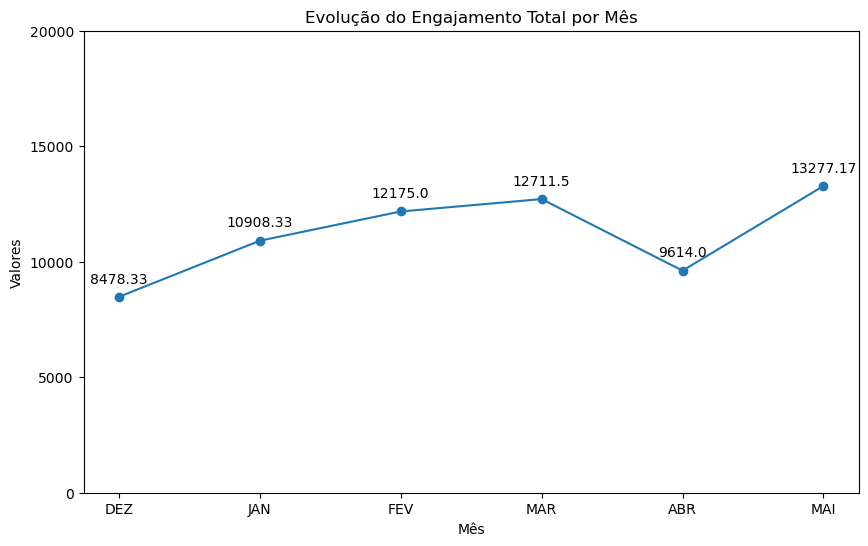

In [484]:
df_sum = df_fretes[['DEZ', 'JAN', 'FEV', 'MAR', 'ABR', 'MAI']]
faturamento_mensal = df_sum.sum()

meses = ['DEZ', 'JAN', 'FEV', 'MAR', 'ABR', 'MAI']
meses_numericos = np.arange(len(meses))

plt.figure(figsize=(10, 6))
plt.plot(meses_numericos, faturamento_mensal.values, marker='o')

for i, valor in enumerate(faturamento_mensal.values):
    valor_arredondado = round(valor, 2)
    plt.annotate(f'{valor_arredondado}', 
                 (meses_numericos[i], valor), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.title('Evolução do Engajamento Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valores')
plt.xticks(meses_numericos, meses)
plt.yticks(np.arange(0, 20001, 5000))
plt.grid(False)
plt.show();

**Criando nova coluna de soma do `faturamento de cada cliente`:**

In [485]:
df_mensalidade['total_mensalidade'] = df_mensalidade[['DEZ', 'JAN', 'FEV', 'MAR', 'ABR', 'MAI']].sum(axis=1)

In [486]:
df_mensalidade.head()

,id_cliente,DEZ,JAN,FEV,MAR,ABR,MAI,total_mensalidade
0,234152437,400,0,400,480,480,0,1760
1,29003995,400,400,0,480,480,480,2240
2,307901217,400,400,400,480,480,480,2640
3,141146221,600,600,600,720,720,720,3960
4,186316338,600,600,600,720,720,0,3240


**Plotando gráfico de ``Faturamento``:**

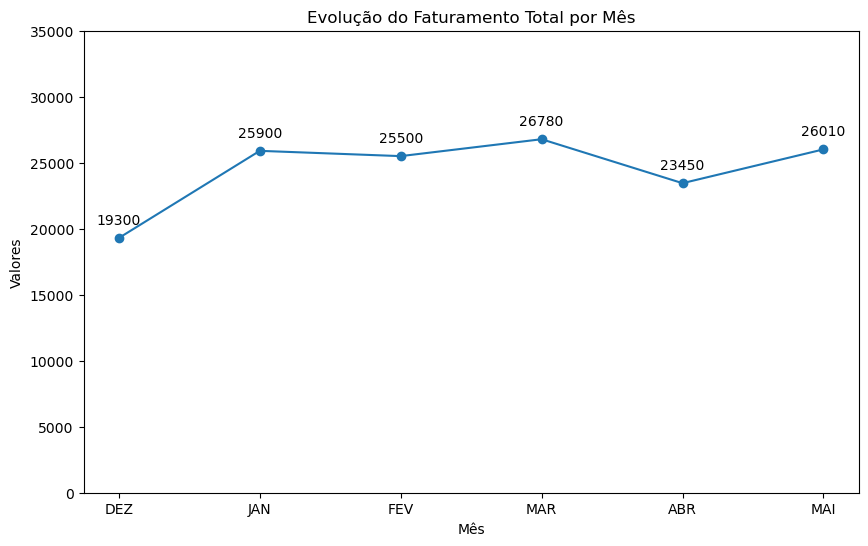

In [487]:
df_sum_2 = df_mensalidade[['DEZ', 'JAN', 'FEV', 'MAR', 'ABR', 'MAI']]
faturamento_mensal_2 = df_sum_2.sum()

plt.figure(figsize=(10, 6))
plt.plot(meses_numericos, faturamento_mensal_2.values, marker='o')

for i, valor in enumerate(faturamento_mensal_2.values):
    valor_arredondado = round(valor, 2)
    plt.annotate(f'{valor_arredondado}', 
                 (meses_numericos[i], valor), 
                 textcoords="offset points", 
                 xytext=(0,10), 
                 ha='center')

plt.title('Evolução do Faturamento Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Valores')
plt.xticks(meses_numericos, meses)
plt.yticks(np.arange(0, 40000, 5000))
plt.grid(False)
plt.show();

**Efetuando o merge entre os dados dataframes ``mensalidade`` e ``fretes``:**

In [488]:
merge_mensa_fretes = pd.merge(df_mensalidade, df_fretes, on='id_cliente', how='outer')
merge_mensa_fretes

,id_cliente,DEZ_x,JAN_x,FEV_x,MAR_x,ABR_x,MAI_x,total_mensalidade,DEZ_y,JAN_y,FEV_y,MAR_y,ABR_y,MAI_y,total_cliente
0,234152437,400,0,400,480,480,0,1760,80.000000,0.000000,133.333333,96.0,120.0,0.0,429.333333
1,29003995,400,400,0,480,480,480,2240,200.000000,133.333333,0.000000,160.0,120.0,96.0,709.333333
2,307901217,400,400,400,480,480,480,2640,200.000000,200.000000,133.333333,120.0,120.0,160.0,933.333333
3,141146221,600,600,600,720,720,720,3960,150.000000,120.000000,300.000000,240.0,180.0,144.0,1134.000000
4,186316338,600,600,600,720,720,0,3240,150.000000,120.000000,200.000000,180.0,180.0,0.0,830.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,171837127,100,100,100,120,120,120,660,50.000000,33.333333,100.000000,30.0,30.0,24.0,267.333333
57,177556629,100,100,0,0,120,120,440,20.000000,20.000000,0.000000,0.0,40.0,60.0,140.000000
58,183276130,0,100,100,120,120,120,560,0.000000,50.000000,100.000000,24.0,30.0,120.0,324.000000
59,188995632,100,100,100,120,120,120,660,33.333333,50.000000,100.000000,120.0,120.0,120.0,543.333333


**Plotando gráfico da comparação entre ``Faturamento`` e ``Engajamento``:**

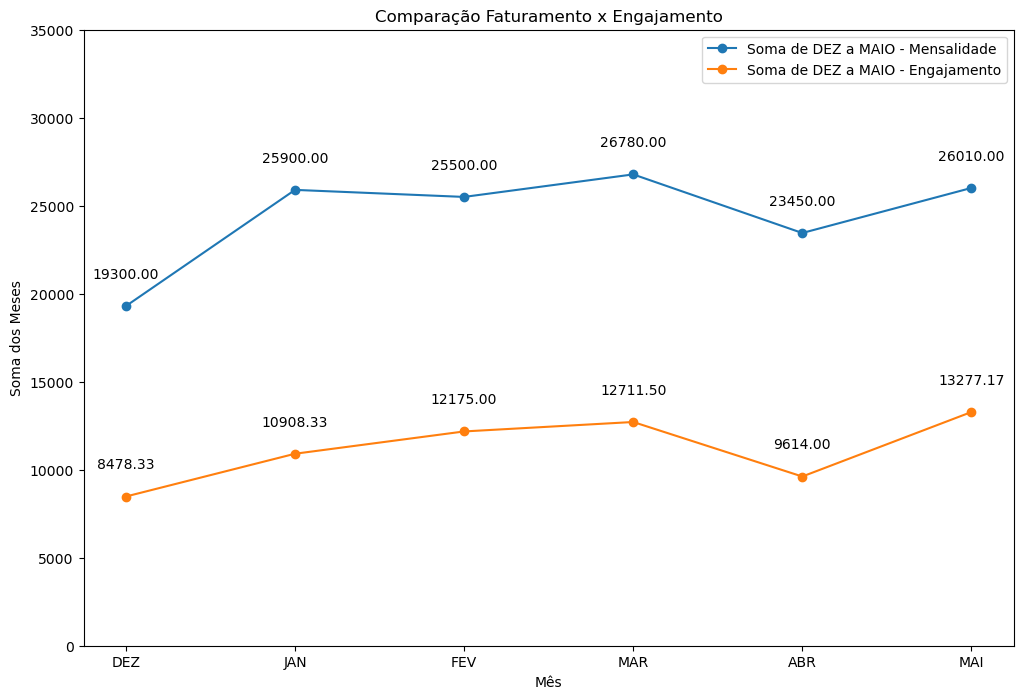

In [489]:
plt.figure(figsize=(12, 8))

valores_x = merge_mensa_fretes[['DEZ_x', 'JAN_x', 'FEV_x', 'MAR_x', 'ABR_x', 'MAI_x']].sum()
plt.plot(meses, valores_x, marker='o', label='Soma de DEZ a MAIO - Mensalidade')

for i, valor in enumerate(valores_x):
    plt.annotate(f'{valor:.2f}', 
                 (meses[i], valor), 
                 textcoords="offset points", 
                 xytext=(0,20), 
                 ha='center')

valores_y = merge_mensa_fretes[['DEZ_y', 'JAN_y', 'FEV_y', 'MAR_y', 'ABR_y', 'MAI_y']].sum()
plt.plot(meses, valores_y, marker='o', label='Soma de DEZ a MAIO - Engajamento')

for i, valor in enumerate(valores_y):
    plt.annotate(f'{valor:.2f}', 
                 (meses[i], valor), 
                 textcoords="offset points", 
                 xytext=(0,20),
                 ha='center')

plt.title('Comparação Faturamento x Engajamento')
plt.xlabel('Mês')
plt.ylabel('Soma dos Meses')
plt.legend()
plt.grid(False)
plt.yticks(np.arange(0, 40000, 5000))
plt.show();

**Calculando a variação do ``Faturamento`` e do ``Engajamento``:**

In [490]:
somas_faturamento = merge_mensa_fretes[['DEZ_x', 'JAN_x', 'FEV_x', 'MAR_x', 'ABR_x', 'MAI_x']].sum()
somas_engajamento = merge_mensa_fretes[['DEZ_y', 'JAN_y', 'FEV_y', 'MAR_y', 'ABR_y', 'MAI_y']].sum()

variacao_faturamento = somas_faturamento.diff()
variacao_engajamento = somas_engajamento.diff()

print("Variação do Faturamento Total:", variacao_faturamento)
print("Variação do Engajamento Total:", variacao_engajamento)

Variação do Faturamento Total: DEZ_x       NaN
JAN_x    6600.0
FEV_x    -400.0
MAR_x    1280.0
ABR_x   -3330.0
MAI_x    2560.0
dtype: float64
Variação do Engajamento Total: DEZ_y            NaN
JAN_y    2430.000000
FEV_y    1266.666667
MAR_y     536.500000
ABR_y   -3097.500000
MAI_y    3663.166667
dtype: float64


**Plotando o gráfico das ``variações``:**

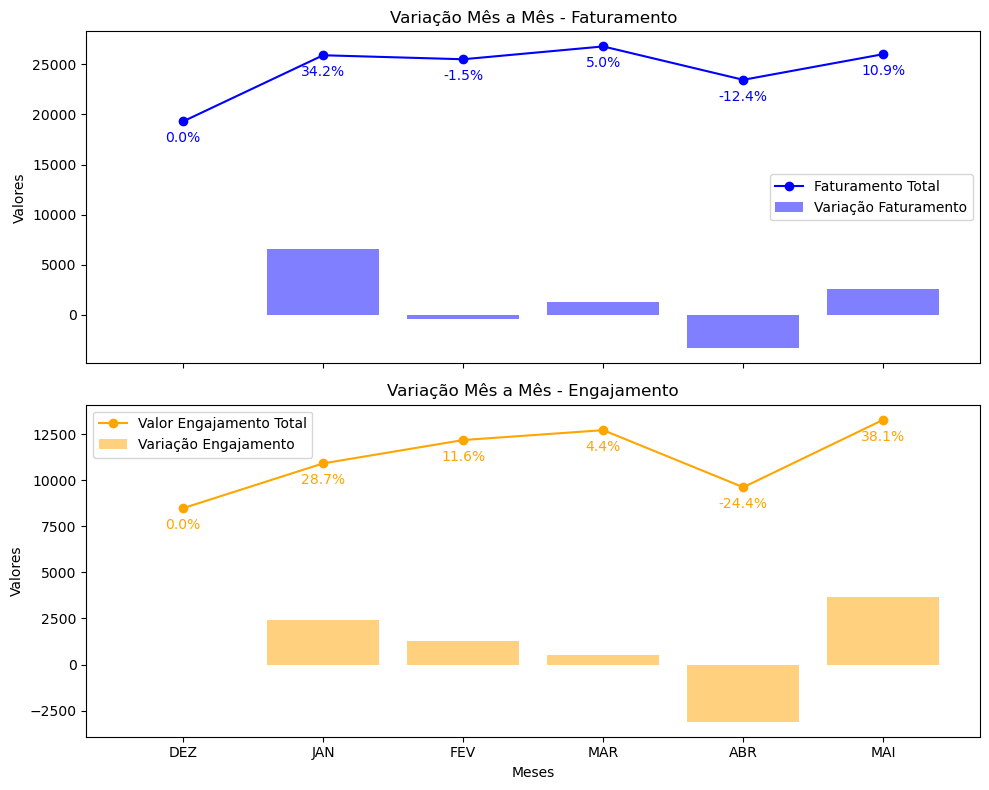

In [491]:
meses = ['DEZ', 'JAN', 'FEV', 'MAR', 'ABR', 'MAI']

somas_x = [19300, 25900, 25500, 26780, 23450, 26010]
somas_y = [8478.333333, 10908.333333, 12175.0, 12711.5, 9614.0, 13277.166667]
variacao_x = [None, 6600.0, -400.0, 1280.0, -3330.0, 2560.0]
variacao_y = [None, 2430.0, 1266.666667, 536.5, -3097.5, 3663.166667]

variacao_x = [0 if v is None else v for v in variacao_x]
variacao_y = [0 if v is None else v for v in variacao_y]

percent_change_x = [0] + [(somas_x[i] - somas_x[i-1]) / somas_x[i-1] * 100 for i in range(1, len(somas_x))]
percent_change_y = [0] + [(somas_y[i] - somas_y[i-1]) / somas_y[i-1] * 100 for i in range(1, len(somas_y))]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

ax1.plot(meses, somas_x, marker='o', linestyle='-', label='Faturamento Total', color='blue')
ax1.bar(meses, variacao_x, color='blue', alpha=0.5, label='Variação Faturamento')

for i, pct in enumerate(percent_change_x):
    ax1.annotate(f'{pct:.1f}%', xy=(meses[i], somas_x[i]), xytext=(0, -15),
                 textcoords='offset points', ha='center', color='blue')

ax1.set_title('Variação Mês a Mês - Faturamento')
ax1.set_ylabel('Valores')
ax1.legend()
ax1.grid(False)

ax2.plot(meses, somas_y, marker='o', linestyle='-', label='Valor Engajamento Total', color='orange')
ax2.bar(meses, variacao_y, color='orange', alpha=0.5, label='Variação Engajamento')

for i, pct in enumerate(percent_change_y):
    ax2.annotate(f'{pct:.1f}%', xy=(meses[i], somas_y[i]), xytext=(0, -15),
                 textcoords='offset points', ha='center', color='orange')

ax2.set_title('Variação Mês a Mês - Engajamento')
ax2.set_xlabel('Meses')
ax2.set_ylabel('Valores')
ax2.legend()
ax2.grid(False)

plt.tight_layout()
plt.show();

**Contando o número de ``clientes inativos`` em cada mês no dataframe ``fretes``:**

In [492]:
zero_counts = (df_fretes[['DEZ', 'JAN', 'FEV', 'MAR', 'ABR', 'MAI']] == 0).sum()

zero_counts_df = zero_counts.reset_index()
zero_counts_df.columns = ['mes', 'contagem_zeros']

print(zero_counts_df)

   mes  contagem_zeros
0  DEZ              14
1  JAN               3
2  FEV               7
3  MAR               9
4  ABR              11
5  MAI              11


**Contando o número de ``clientes inativos`` em cada mês no dataframe ``mensalidade``:**

In [493]:
zero_counts = (df_mensalidade[['DEZ', 'JAN', 'FEV', 'MAR', 'ABR', 'MAI']] == 0).sum()

zero_counts_df = zero_counts.reset_index()
zero_counts_df.columns = ['mes', 'contagem_zeros']

print(zero_counts_df)

   mes  contagem_zeros
0  DEZ              14
1  JAN               3
2  FEV               7
3  MAR               9
4  ABR              11
5  MAI              11


**Plotando o gráfico da ``Contagem``:**

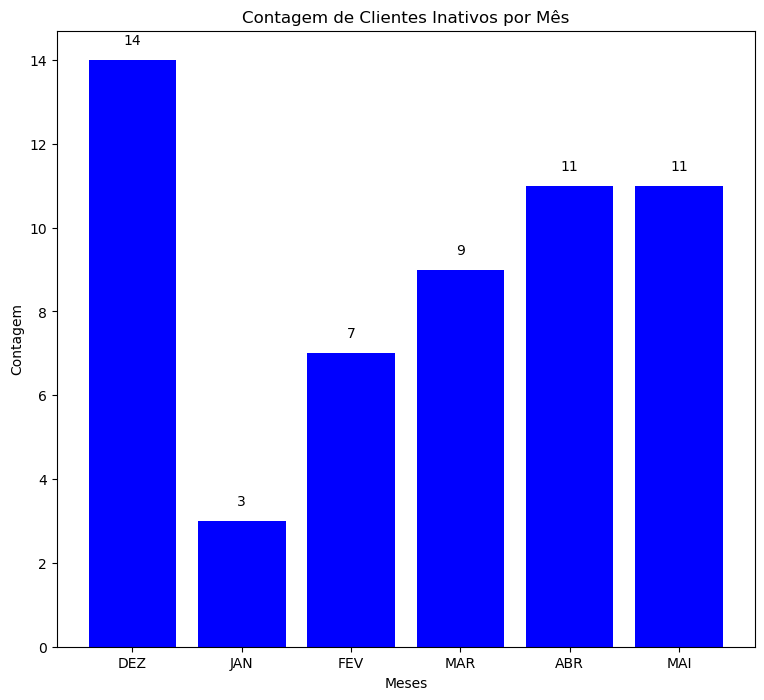

In [494]:
meses = ['DEZ', 'JAN', 'FEV', 'MAR', 'ABR', 'MAI']
contagem_zeros = [14, 3, 7, 9, 11, 11]

plt.figure(figsize=(9, 8))
bars = plt.bar(meses, contagem_zeros, color='b')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.3, int(yval), ha='center', va='bottom')
    
plt.title('Contagem de Clientes Inativos por Mês')
plt.xlabel('Meses')
plt.ylabel('Contagem')
plt.show();

**Contando o número de clientes em ``cada mês`` para ``cada categoria``:**

In [495]:
bins = [0, 200, 500, 800, 1000, float('inf')]
labels = ['1-200', '201-500', '501-800', '801-1000', '1001+']
df_categorias = df_mensalidade[['DEZ', 'JAN', 'FEV', 'MAR', 'ABR', 'MAI']].apply(lambda x: pd.cut(x, bins=bins, labels=labels, right=True))

categoria_counts = df_categorias.apply(pd.Series.value_counts)
categoria_counts = categoria_counts.T
category_counts_df = categoria_counts.reset_index().rename(columns={'index': 'Mes'})

print(category_counts_df)

   Mes  1-200  201-500  501-800  801-1000  1001+
0  DEZ     29        5        4         4      5
1  JAN     35        6        4         5      8
2  FEV     31        6        4         5      8
3  MAR     30        7        4         0     11
4  ABR     31        6        4         0      9
5  MAI     29        6        3         0     12


**Plotando o ``Mapa de Calor`` da contagem:**

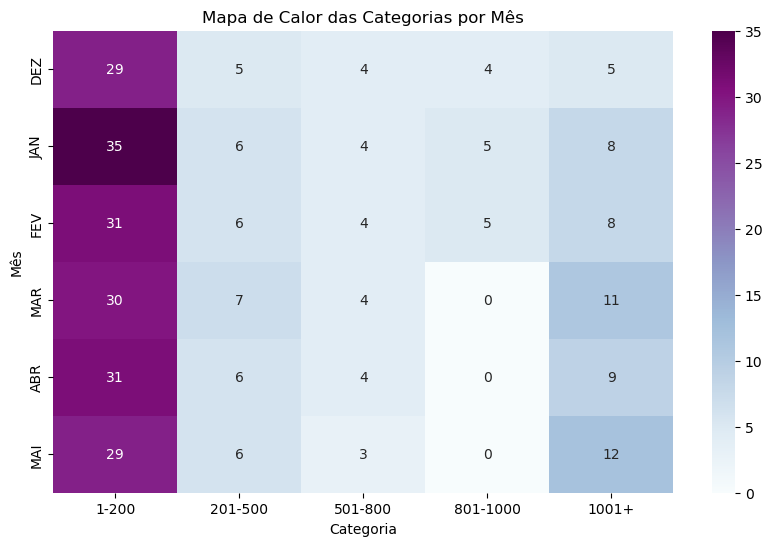

In [496]:
plt.figure(figsize=(10, 6))
sns.heatmap(category_counts_df.set_index('Mes'), annot=True, cmap='BuPu', fmt="d")

plt.title('Mapa de Calor das Categorias por Mês')
plt.ylabel('Mês')
plt.xlabel('Categoria')
plt.show();

**Plotando o ``as categorias por mês``:**

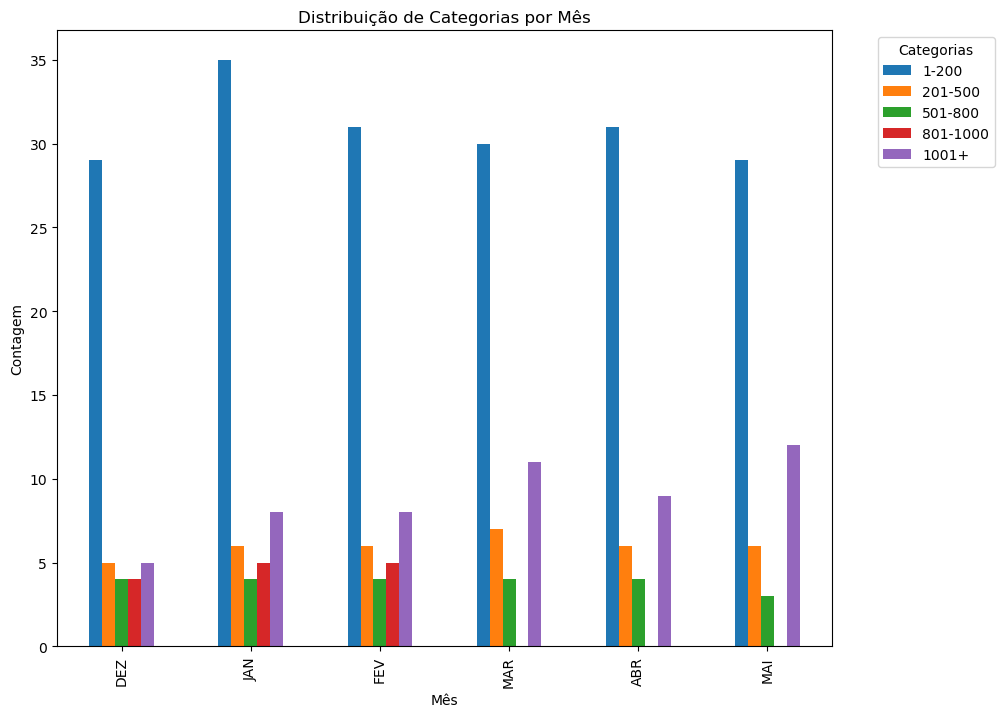

In [497]:
ax = category_counts_df.set_index('Mes').plot(kind='bar', figsize=(10, 8))

plt.title('Distribuição de Categorias por Mês')
plt.ylabel('Contagem')
plt.xlabel('Mês')
plt.legend(title='Categorias')
plt.legend(title="Categorias", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

**Plotando o ``Faturamento percentual`` de cada categoria:**

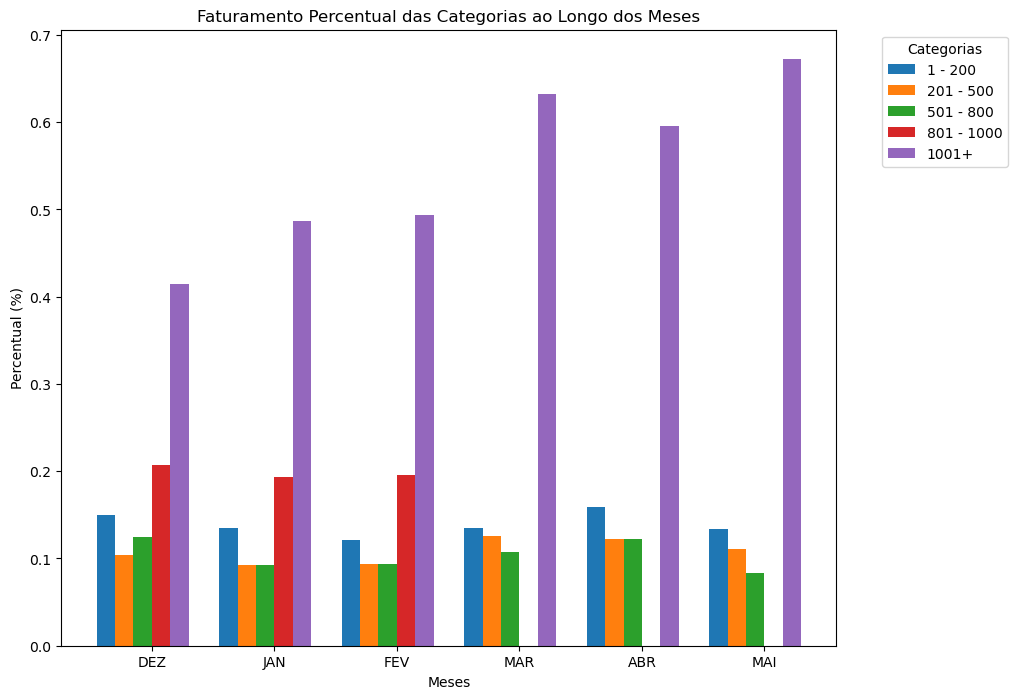

In [498]:
meses = ['DEZ_perc', 'JAN_perc', 'FEV_perc', 'MAR_perc', 'ABR_perc', 'MAI_perc']

df_fatur_filtered = df_fatur[df_fatur["Categorias"] != "Total"]

plt.figure(figsize=(10, 8))
width = 0.15

positions = np.arange(len(meses))

for i, categoria in enumerate(df_fatur_filtered["Categorias"]):
    plt.bar(positions + i*width, df_fatur_filtered.loc[i, titles], width=width, label=categoria)

plt.title("Faturamento Percentual das Categorias ao Longo dos Meses")
plt.xlabel("Meses")
plt.ylabel("Percentual (%)")
plt.xticks(positions + width * 2.5, ['DEZ', 'JAN', 'FEV', 'MAR', 'ABR', 'MAI'])
plt.legend(title="Categorias", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(False)
plt.show();

**Selecionando ``top 5 clientes`` de cada dataframe:**

In [499]:
top_5_clientes_faturamento = df_mensalidade.sort_values(by='total_mensalidade', ascending=False).head(5)
top_5_clientes_faturamento

,id_cliente,DEZ,JAN,FEV,MAR,ABR,MAI,total_mensalidade
9,174850692,1700,1700,1700,1870,1870,1870,10710
13,177551560,1700,1700,1700,1870,1870,1870,10710
12,261596325,1700,1700,1700,1870,1870,1870,10710
11,220912614,0,1700,1700,1870,1870,1870,9010
10,197236123,0,1700,1700,1870,1870,1870,9010


In [500]:
top_5_clientes_engajamento = df_fretes.sort_values(by='total_cliente', ascending=False).head(5)
top_5_clientes_engajamento

,id_cliente,DEZ,JAN,FEV,MAR,ABR,MAI,total_cliente
9,174850692,425.000000,850.000000,850.000000,1870.0,374.000000,1870.0,6239.000000
10,197236123,0.000000,850.000000,566.666667,374.0,1870.000000,1870.0,5530.666667
12,261596325,566.666667,566.666667,850.000000,1870.0,935.000000,374.0,5162.333333
11,220912614,0.000000,1700.000000,1700.000000,467.5,623.333333,467.5,4958.333333
13,177551560,425.000000,340.000000,425.000000,1870.0,623.333333,935.0,4618.333333


**Realizando um merge dos dois  ``top 5 clientes``:**

In [501]:
top_5_clientes_faturamento_filtrado = top_5_clientes_faturamento[['id_cliente', 'total_mensalidade']]
top_5_clientes_engajamento_filtrado = top_5_clientes_engajamento[['id_cliente', 'total_cliente']]
merge_top_clientes = pd.merge(top_5_clientes_faturamento_filtrado, top_5_clientes_engajamento_filtrado, on='id_cliente', how='outer')
merge_top_clientes

,id_cliente,total_mensalidade,total_cliente
0,174850692,10710,6239.000000
1,177551560,10710,4618.333333
2,261596325,10710,5162.333333
3,220912614,9010,4958.333333
4,197236123,9010,5530.666667


**Plotando o gráfico do ``top 5 clientes``:**

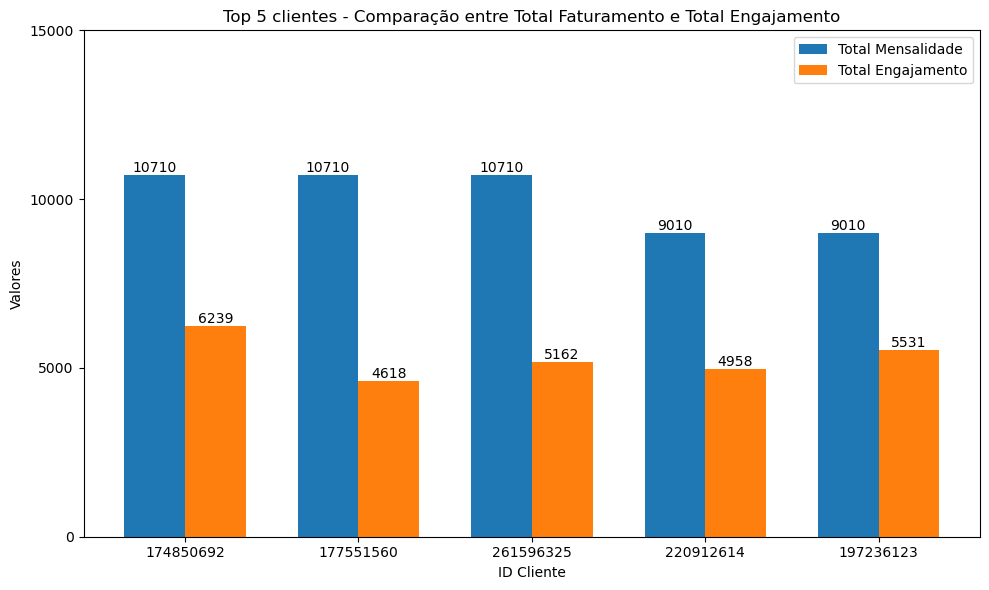

In [502]:
bar_width = 0.35
index = np.arange(len(merge_top_clientes['id_cliente']))

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = plt.bar(index, merge_top_clientes['total_mensalidade'], bar_width, label='Total Mensalidade')
bars2 = plt.bar(index + bar_width, merge_top_clientes['total_cliente'], bar_width, label='Total Engajamento')

for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom')

plt.xlabel('ID Cliente')
plt.ylabel('Valores')
plt.title('Top 5 clientes - Comparação entre Total Faturamento e Total Engajamento')
plt.xticks(index + bar_width / 2, merge_top_clientes['id_cliente'])
plt.yticks(np.arange(0, 20000, 5000))
plt.legend()

plt.tight_layout()
plt.show();